<a href="https://colab.research.google.com/github/Muhammad-Hozefa-Haider/airlift_case_study/blob/main/Airlift_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airlift Technologies
## Case Study - Analyst

By: Muhammad Hozefa Haider

The purpose of this notebook is to document and answer the following three questions asked in the case study provided by Airlift technologies for Lift Graduate Program.
1.	 Explore the data and share your findings. Do you see any interesting patterns?
2.	Forecast daily orders for the next week (9th November, 2021 - 15th November, 2021) for both, EW1 and EW2.
3.	How can you measure forecasting accuracy of a forecasting model?


In [168]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [170]:
data = pd.read_csv('/content/gdrive/My Drive/CaseStudy_Data.csv', parse_dates = ['date'])

In [227]:
data

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
140,EW2,2021-11-04,1490
141,EW2,2021-11-05,1067
142,EW2,2021-11-06,1591
143,EW2,2021-11-07,1696


In [172]:
data.dtypes

warehouse               object
date            datetime64[ns]
total_orders             int64
dtype: object

In [173]:
data.describe()

,total_orders
count,145.000000
mean,665.737931
std,432.390401
min,4.000000
25%,375.000000
50%,526.000000
75%,946.000000
max,1728.000000


In [206]:
EW1 = data[data['warehouse']=='EW1']
EW2 = data[data['warehouse']=='EW2']
del EW1['warehouse']
del EW2['warehouse']

EW1.rename(
    columns={"date":"ds",
                "total_orders":"y"}
          ,inplace=True)

EW2.rename(
    columns={"date":"ds",
                "total_orders":"y"}
          ,inplace=True)

In [211]:
#Model for EW1

from fbprophet import Prophet

# define the model
model = Prophet()
# fit the model
model.fit(EW1)

future = model.make_future_dataframe(periods=7)
future.tail(7)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
90,2021-11-09,344.877242,28.359654,685.137662
91,2021-11-10,277.273082,-58.828399,606.869600
92,2021-11-11,328.376068,5.497593,660.305982
93,2021-11-12,300.467551,-74.594982,661.427172
94,2021-11-13,371.154452,18.536866,728.724731
95,2021-11-14,375.217830,40.732287,696.249681
96,2021-11-15,317.401100,-14.738908,647.022175


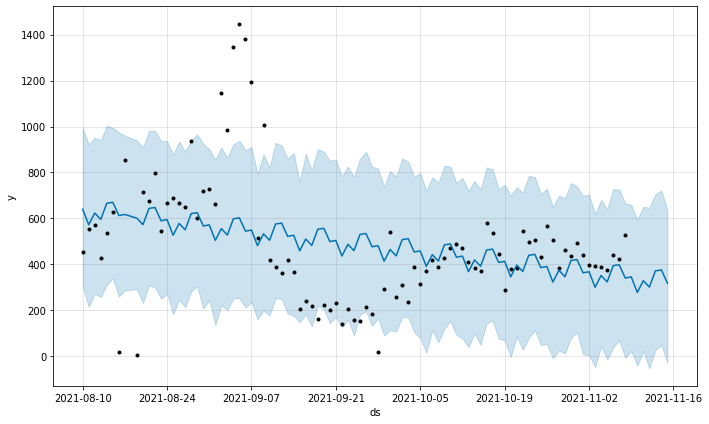

In [186]:
fig1 = model.plot(forecast)

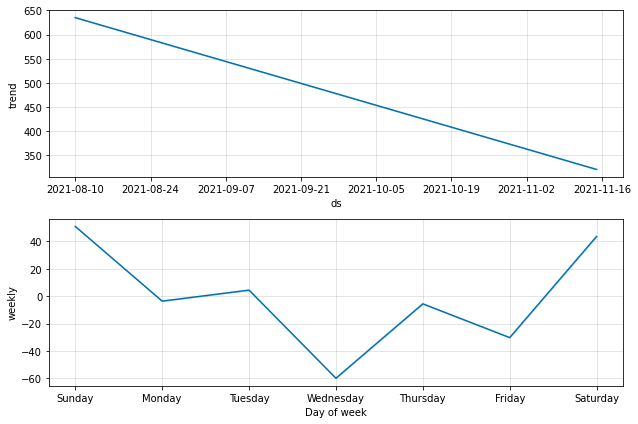

In [216]:
fig2 = model.plot_components(forecast)

In [189]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [208]:
# Model for EW2
from fbprophet import Prophet

# define the model
model2 = Prophet()
# fit the model
model2.fit(EW2)

future2 = model2.make_future_dataframe(periods=7)
future2.tail(7)

forecast2 = model2.predict(future2)
;;;;;;;;;;;
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
55,2021-11-09,1640.141917,1408.701142,1871.190587
56,2021-11-10,1783.931121,1543.258859,2021.642655
57,2021-11-11,1826.906821,1575.432864,2063.772487
58,2021-11-12,1644.799802,1402.387790,1887.850796
59,2021-11-13,1860.802103,1631.423671,2092.605161
60,2021-11-14,1852.842328,1602.685202,2084.417527
61,2021-11-15,1937.013216,1690.363865,2166.640764


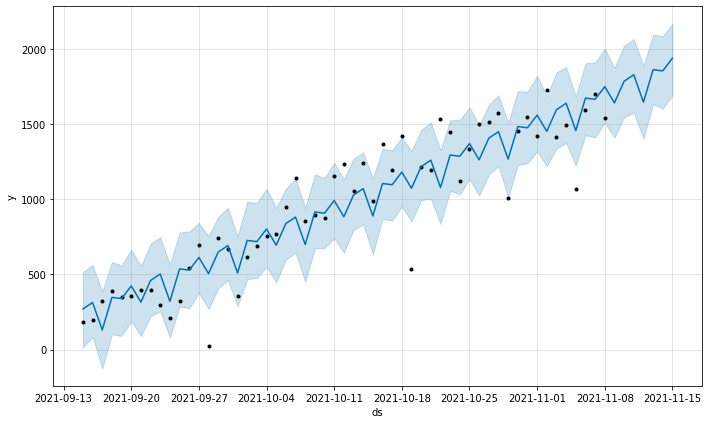

In [217]:
fig3 = model2.plot(forecast2)

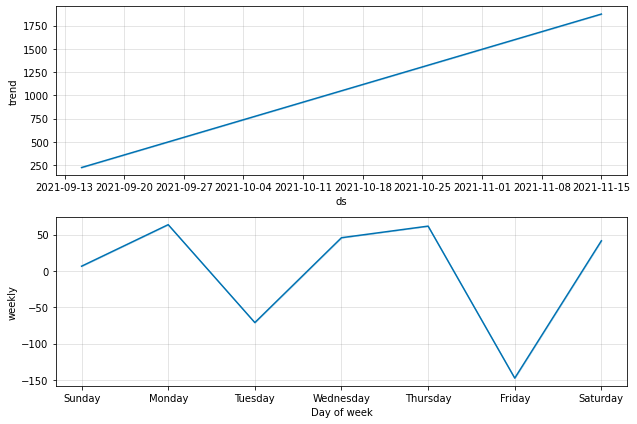

In [218]:
fig4 = model2.plot_components(forecast2)

In [209]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model2, forecast2)

In [204]:
#Validation for EW1

from fbprophet.diagnostics import cross_validation
EW1_cv = cross_validation(model, initial='60 days', period='30 days', horizon = '7 days')

from fbprophet.diagnostics import performance_metrics
EW1_p = performance_metrics(EW1_cv)
EW1_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-11-01 00:00:00 and 2021-11-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [214]:
#Validation for EW2

EW2_cv = cross_validation(model2, initial='40 days', period='15 days', horizon = '7 days')

EW2_p = performance_metrics(EW2_cv)
EW2_p

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-11-01 00:00:00 and 2021-11-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,71711.459038,267.789953,267.789953,0.154971,0.154971,0.0
1,2 days,72760.310859,269.741192,269.741192,0.190765,0.190765,0.0
2,3 days,53840.828082,232.036265,232.036265,0.155729,0.155729,0.0
3,4 days,257342.856991,507.289717,507.289717,0.475436,0.475436,0.0
4,5 days,24151.954263,155.408990,155.408990,0.097680,0.097680,1.0
5,6 days,694.695467,26.357076,26.357076,0.015541,0.015541,1.0
6,7 days,92574.343199,304.260321,304.260321,0.197957,0.197957,0.0


In [225]:
metric_EW1 = forecast.set_index('ds')[['yhat']].join(EW1.set_index('ds').y).reset_index()
metric_EW1.dropna(inplace=True)
metric_EW1.tail()

,ds,yhat,y
85,2021-11-04,351.049295,386.0
86,2021-11-05,323.140778,375.0
87,2021-11-06,393.827679,441.0
88,2021-11-07,397.891057,421.0
89,2021-11-08,340.074327,526.0


In [222]:
r2= r2_score(metric_EW1.y, metric_EW1.yhat)
mse = mean_squared_error(metric_EW1.y, metric_EW1.yhat)
mae = mean_absolute_error(metric_EW1.y, metric_EW1.yhat)

print('The r2 score for EW1 is ', r2)
print('\nThe mse score for EW1 is ', mse)
print('\nThe mae score for EW1 is ', mae)

The r2 score for EW1 is  0.10922915890525464

The mse score for EW1 is  69838.33876179578

The mae score for EW1 is  185.43935277280207


In [226]:
metric_EW2 = forecast.set_index('ds')[['yhat']].join(EW2.set_index('ds').y).reset_index()
metric_EW2.dropna(inplace=True)
metric_EW2.tail()

,ds,yhat,y
85,2021-11-04,351.049295,1490.0
86,2021-11-05,323.140778,1067.0
87,2021-11-06,393.827679,1591.0
88,2021-11-07,397.891057,1696.0
89,2021-11-08,340.074327,1537.0


In [224]:
r22= r2_score(metric_EW2.y, metric_EW2.yhat)
mse2 = mean_squared_error(metric_EW2.y, metric_EW2.yhat)
mae2 = mean_absolute_error(metric_EW2.y, metric_EW2.yhat)

print('The r2 score for EW1 is ', r2)
print('\nThe mse score for EW1 is ', mse)
print('\nThe mae score for EW1 is ', mae)

The r2 score for EW1 is  0.10922915890525464

The mse score for EW1 is  69838.33876179578

The mae score for EW1 is  185.43935277280207
